# Random Forest Regression

problem statement :

Build a machine learning model to predict salary  based on position for a given dataset
https://drive.google.com/open?id=1jKfNxQkybZKprVpCkoL16mTjmSSnCol3


In [1]:
#importing necessary library
#importing matplotlib 
import matplotlib.pyplot as plt
#importing seaborn
import seaborn as sea
#importing pandas 
import pandas as pd
#importing numpy
import numpy as np
#importing job-lib
import joblib

#importing scikit learn  library classes
import sklearn.model_selection as model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import svm


# loading csv data from the file given in the url
data_set = pd.read_csv("Position_Salaries.csv")
#prinding info of data
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [2]:
## looking at data set
data_set

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


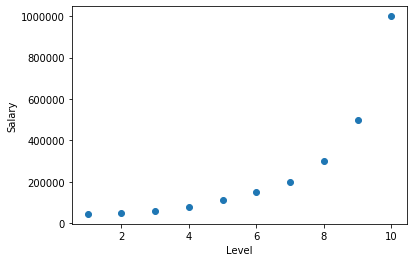

In [3]:
plt.scatter(data_set['Level'], data_set['Salary'])
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

#### Splitting data set 

In [4]:
# taking all features in a variable
x_values = data_set['Level'].values.reshape(-1,1)
# taking target variable
y_values = data_set['Salary'].values

#obtaining splitted training and test data set
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(x_values,y_values,test_size=0.2,random_state=0)

#### making R F R model 

In [5]:
regressor = RandomForestRegressor()
regressor.fit(train_X, train_Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [6]:
joblib.dump(regressor,'01_rfr_regressor.pkl')

['01_rfr_regressor.pkl']

In [7]:
test_prediction = regressor.predict(test_X)
train_prediction = regressor.predict(train_X)

#### Plotting graph and calculating errors 

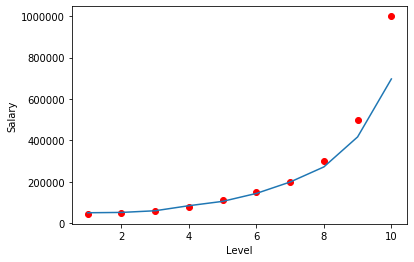

In [8]:
plt.scatter(data_set['Level'], data_set['Salary'],color='red')
plt.plot(data_set['Level'], regressor.predict(x_values))
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [9]:
#calculating different types of errors 
print('Mean Absolute Error:', metrics.mean_absolute_error(test_Y, test_prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(test_Y, test_prediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_Y, test_prediction)))

Mean Absolute Error: 41625.0
Mean Squared Error: 3444531250.0
Root Mean Squared Error: 58690.129067842405
